In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/colab_notebooks/Data/main_dataset.csv')

In [4]:
train_data['Id'] = np.where(train_data['Id'] < 1e-18, 1e-18, train_data['Id'])
train_data['Log_Id'] = np.log10(train_data['Id'])

In [ ]:
X = train_data[['Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']] # ignoring Nc
y = train_data['Log_Id']

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle = True)

# model.fit(X_train, y_train)
# model = BaggingRegressor(estimator=RandomForestRegressor(n_estimators = 100, n_jobs = -1), n_estimators=3, random_state=42, n_jobs = -1)
# model2 = BaggingRegressor(estimator=ExtraTreesRegressor(n_estimators = 100, n_jobs = -1, random_state = 42 ), n_estimators = 5, random_state=42, n_jobs = -1)


In [ ]:
# the above code was execulted on google collab with TPU processor, since it is taking more than 1 hour to train the model in laptop
# importing the trained model
import joblib
model = joblib.load('/content/drive/MyDrive/colab_notebooks/Data/bagged-extraTreeRegressor.joblib')
model.score(X_train, y_train)

0.9998465496420349

In [8]:
y_pred_1 = model.predict(X_test)
print(r2_score(y_pred_1, y_test))

0.9992803337120498


In [ ]:
# note :
# ignored the Tsi column
# the train inputs are preprocesses with polynomail features (degree = 3, include_bias = False)
# train inputs are further processed StanderScaler
# while testing the test data - first preprocess the data by removing the values less than 1e-18
# preprocess - data with poly(which was fitted on to the train) and scaler (which wass fitted on train)

# model predicts the log(Id) value

In [ ]:
# testing the model on the test data set
#  importing the test data
test_data = pd.read_csv('/content/drive/MyDrive/colab_notebooks/Data/test_data.csv')


In [11]:
print(test_data[test_data['Vgs'] == 2].index.tolist())

[202, 405, 608, 811, 1014]


In [12]:
test_data = test_data.iloc[0:202]
print(test_data)

     Tsi  Tox            Ns            Nc            Nd  Vds       Vgs  \
0     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.000000   
1     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.002000   
2     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.005733   
3     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.012951   
4     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.022951   
..   ...  ...           ...           ...           ...  ...       ...   
197   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.952951   
198   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.962951   
199   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.972951   
200   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.982951   
201   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.992951   

               Id  
0    2.330000e-18  
1    4.340000e-18  
2    1.130000e-18  
3    5.430000e-19  
4    4.5200

In [13]:
test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

X_test_1 = test_data[[ 'Tox','Nc', 'Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

In [14]:
X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)

y_pred_test_1 = model.predict(X_test_1_scaled)
print(r2_score(y_pred_test_1, y_test_1))

0.9951789791250041


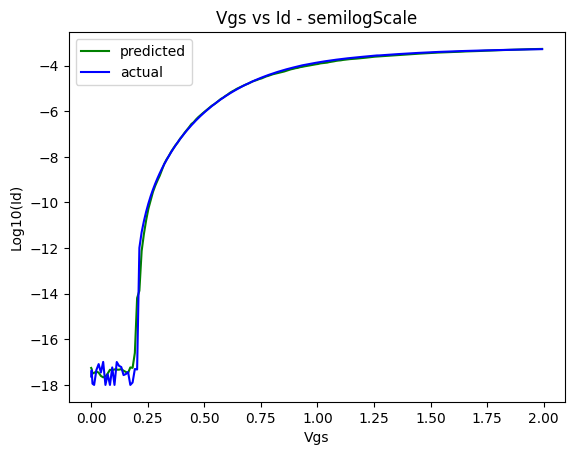

In [15]:
# plotting the data
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green", label="predicted")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue", label="actual")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.legend()
plt.show()

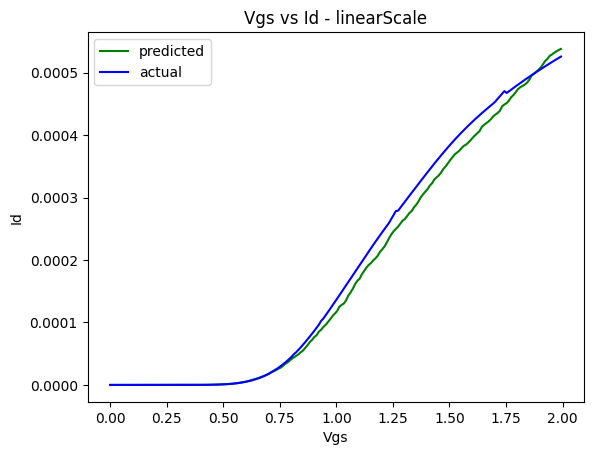

In [16]:
# plotting the data

plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green", label="predicted")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue", label="actual")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.legend()
plt.show()

Experiment 1 R² score: 0.9951884457292729
Experiment 2 R² score: 0.9623687472708555
Experiment 3 R² score: 0.9639592343288466
Experiment 4 R² score: 0.9683657851080294
Experiment 5 R² score: 0.999904894983381


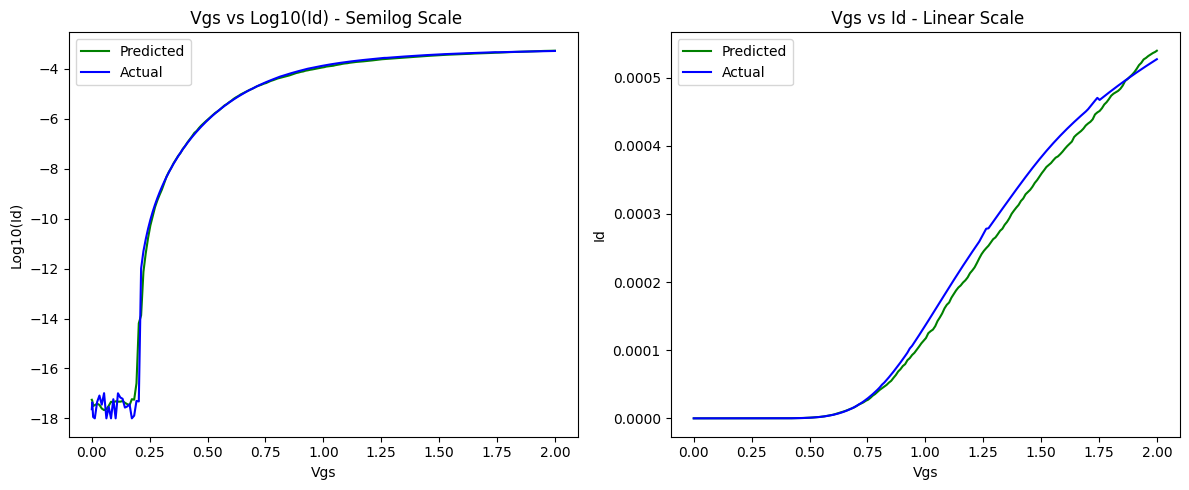

--------------


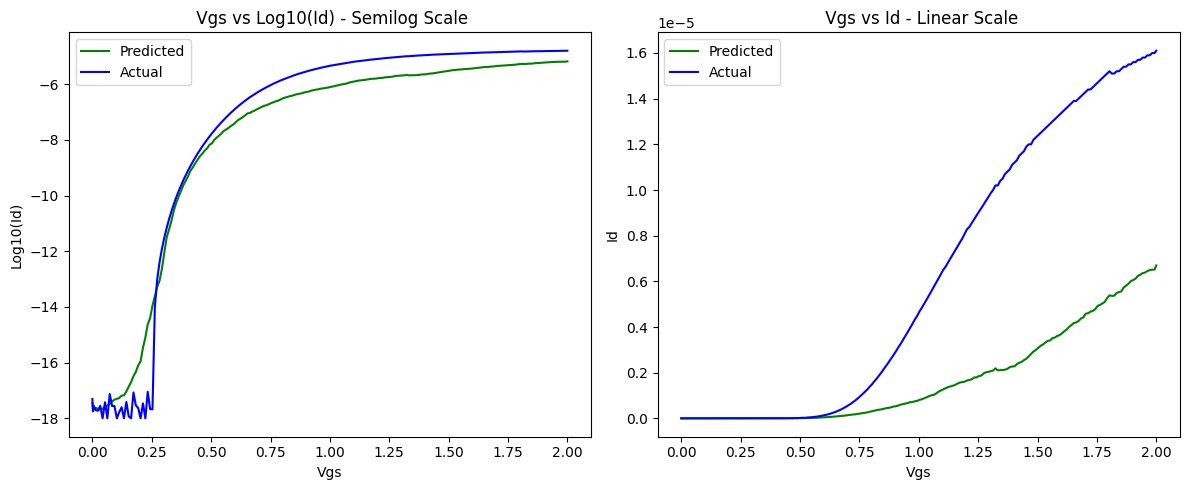

--------------


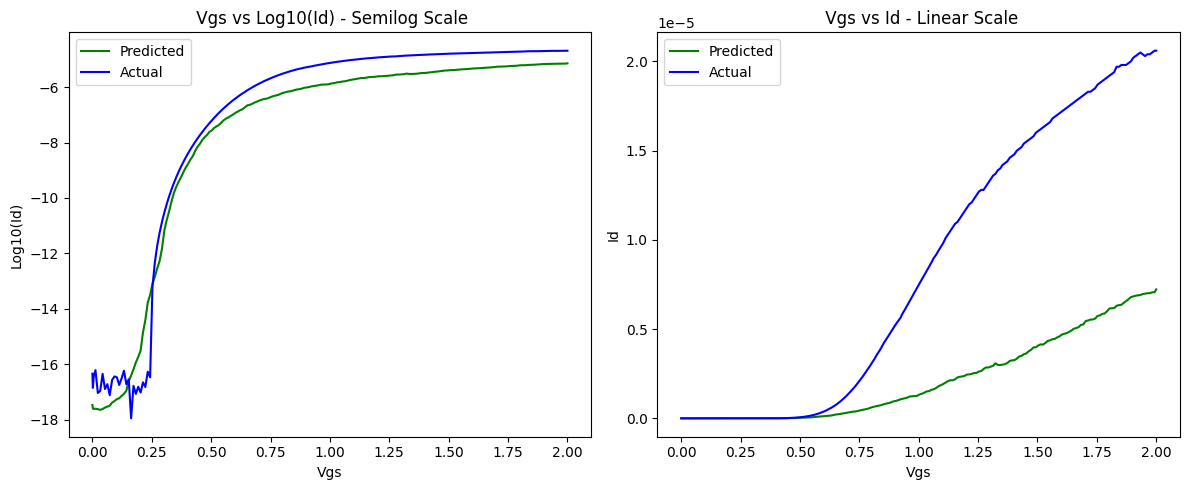

--------------


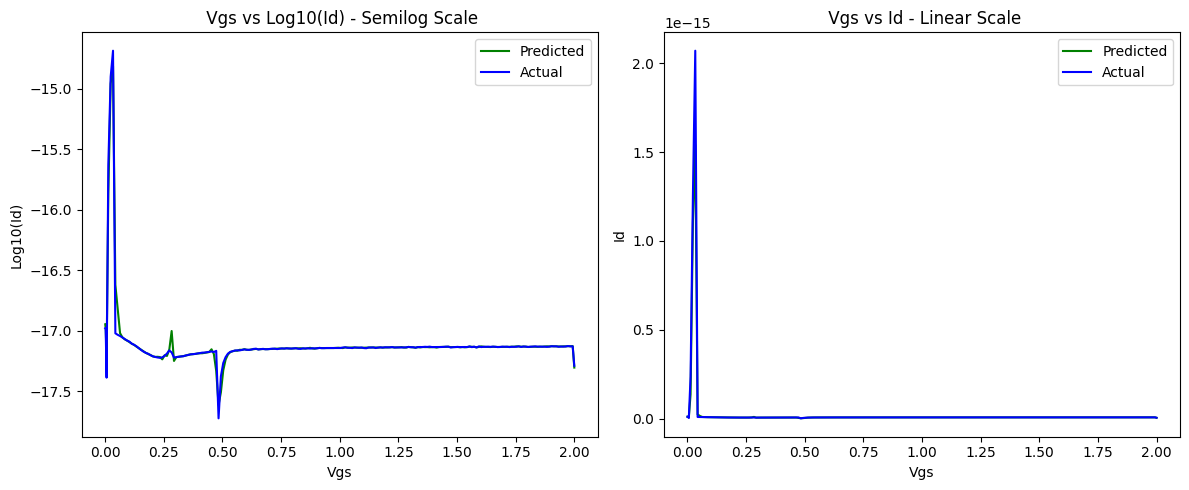

--------------


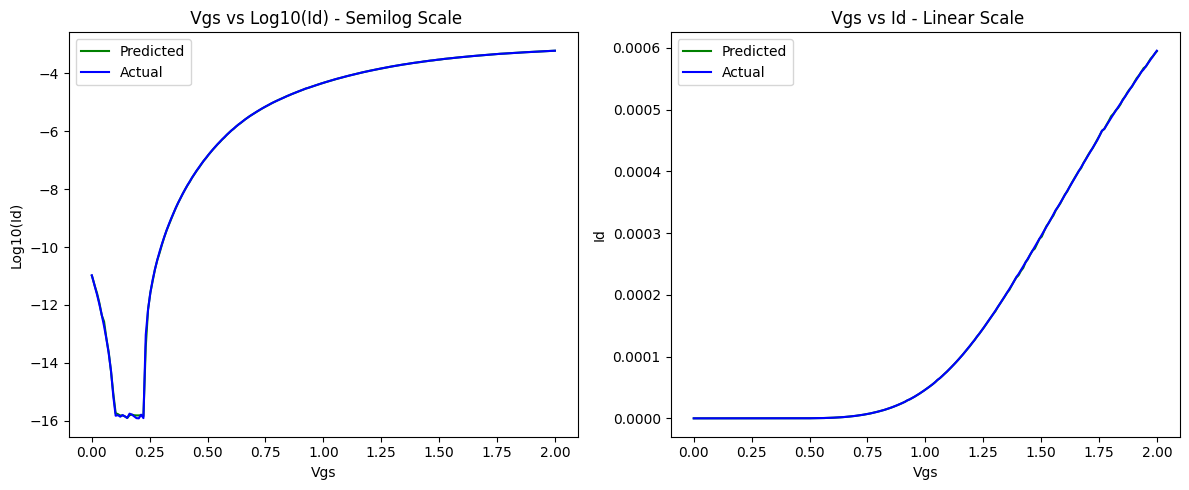

--------------


In [ ]:

# Load test data
test_data = pd.read_csv('/content/drive/MyDrive/colab_notebooks/Data/test_data.csv')


experiment_indexes = [202, 405, 608, 811, 1014]



# Iterate over each experiment based on the defined indexes
for i in range(len(experiment_indexes)):
    if i == 0:
        start_index = 0
    else:
        start_index = experiment_indexes[i - 1] + 1  # +1 to start after the previous end index

    end_index = experiment_indexes[i]

    # Slice the test_data for the current experiment
    experiment_data = test_data.iloc[start_index:end_index + 1]  # +1 to include end index

    # Prepare the test data
    experiment_data['Id'] = np.where(experiment_data['Id'] < 1e-18, 1e-18, experiment_data['Id'])
    experiment_data['Log_Id'] = np.log10(experiment_data['Id'])

    X_test = experiment_data[['Tox', 'Nc', 'Nd', 'Ns', 'Vds', 'Vgs']]
    y_test = experiment_data['Log_Id']

    # Transform and scale the features
    X_test_transformed = poly.transform(X_test)  # Fit the polynomial features
    X_test_scaled = scaler.transform(X_test_transformed)  # Fit the scaler

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Store predictions, actual values, and Vgs for plotting
    predictions.append(y_pred)
    actuals.append(y_test.values)
    vgs_values.append(X_test['Vgs'].values)

    # Print R² score for current experiment
    print(f"Experiment {i + 1} R² score: {r2_score(y_pred, y_test)}")

# Plotting the results for all experiments
for i in range(len(experiment_indexes)):
    plt.figure(figsize=(12, 5))

    # Semilog Scale Plot
    plt.subplot(1, 2, 1)
    plt.plot(vgs_values[i], predictions[i], color="green", label="Predicted")
    plt.plot(vgs_values[i], actuals[i], color="blue", label="Actual")
    plt.title(f' Vgs vs Log10(Id) - Semilog Scale')
    plt.xlabel('Vgs')
    plt.ylabel('Log10(Id)')
    plt.show()
    plt.legend()

    # Linear Scale Plot
    plt.subplot(1, 2, 2)
    plt.plot(vgs_values[i], np.maximum(np.power(10, predictions[i]), 1e-18), color="green", label="Predicted")
    plt.plot(vgs_values[i], np.maximum(np.power(10, actuals[i]), 1e-18), color="blue", label="Actual")
    plt.title(f' Vgs vs Id - Linear Scale')
    plt.xlabel('Vgs')
    plt.ylabel('Id')
    plt.legend()

    plt.tight_layout()
    plt.show()
    print("--------------")



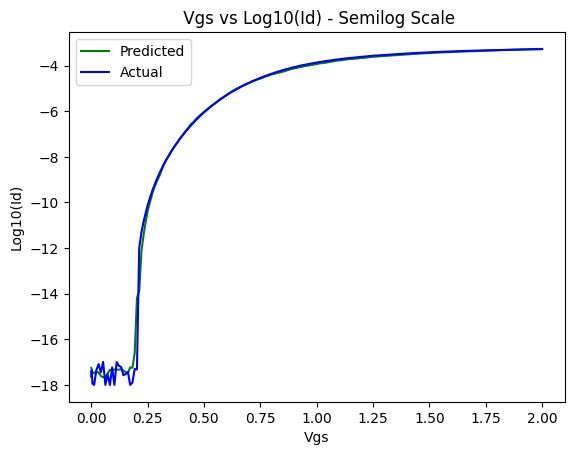

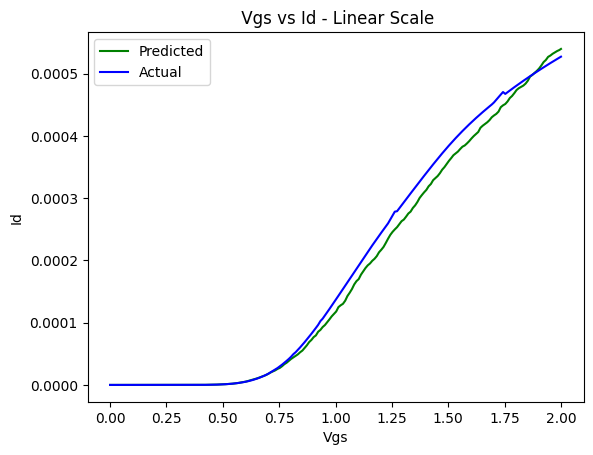

--------------


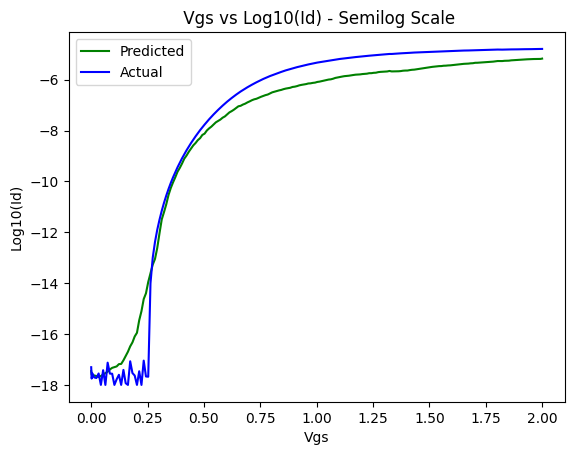

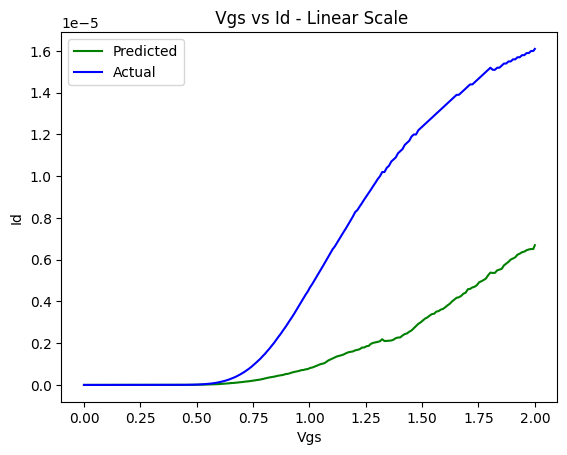

--------------


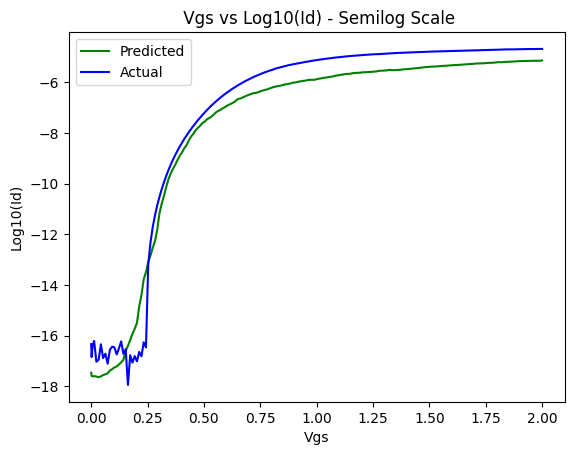

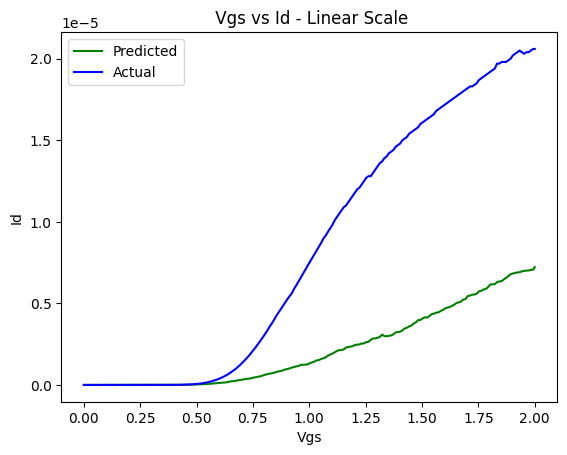

--------------


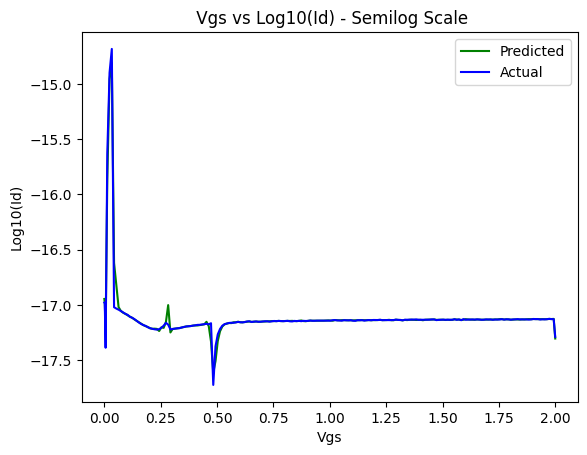

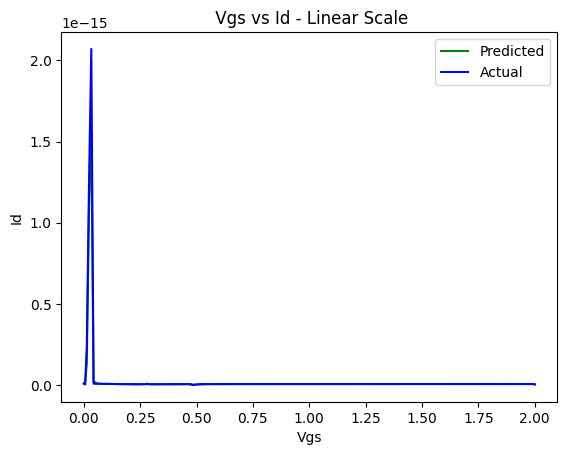

--------------


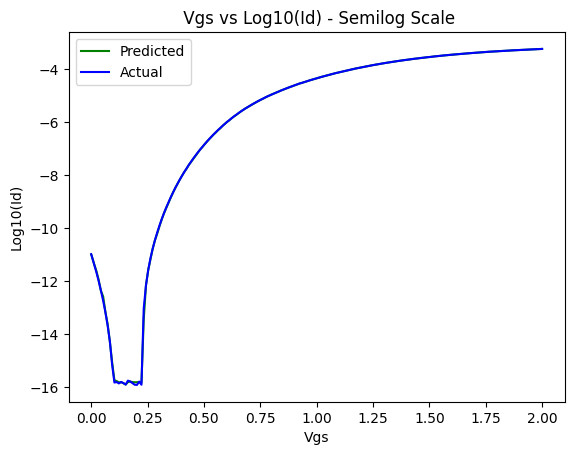

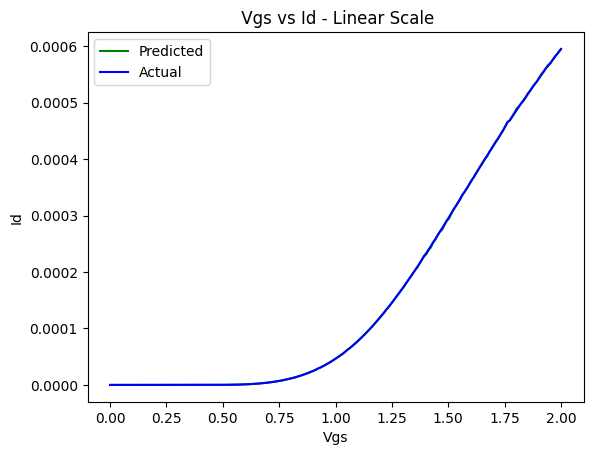

--------------


In [28]:

# Plotting the results for all experiments
for i in range(len(experiment_indexes)):

    # Semilog Scale Plot
    plt.figure()
    plt.plot(vgs_values[i], predictions[i], color="green", label="Predicted")
    plt.plot(vgs_values[i], actuals[i], color="blue", label="Actual")
    plt.title(f' Vgs vs Log10(Id) - Semilog Scale')
    plt.xlabel('Vgs')
    plt.ylabel('Log10(Id)')
    plt.legend()
    plt.show()


    # Linear Scale Plot
    plt.figure()
    plt.plot(vgs_values[i], np.maximum(np.power(10, predictions[i]), 1e-18), color="green", label="Predicted")
    plt.plot(vgs_values[i], np.maximum(np.power(10, actuals[i]), 1e-18), color="blue", label="Actual")
    plt.title(f' Vgs vs Id - Linear Scale')
    plt.xlabel('Vgs')
    plt.ylabel('Id')
    plt.legend()
    plt.show()
    print("--------------")
